In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Indian_Kids_Screen_Time_cleaned (1).csv")


In [6]:
list(df.columns)

['Age',
 'Gender',
 'Avg_Daily_Screen_Time_hr',
 'Primary_Device',
 'Exceeded_Recommended_Limit',
 'Educational_to_Recreational_Ratio',
 'Health_Impacts',
 'Urban_or_Rural',
 'Age_Band',
 'Device_Type',
 'Health_Impact_Type',
 'Device_Share',
 'Edu_Recreational_Percent']

In [8]:
# --- 1. Create Cohorts: Age Band × Device Type ---
cohort_counts = df.groupby(['Age_Band', 'Primary_Device']).size().reset_index(name='User_Count')

# --- Find Top Cohorts ---
top_cohorts = cohort_counts.sort_values(by='User_Count', ascending=False).head(10)
print("\nTop 10 Cohorts (Age Band × Device Type):")
print(top_cohorts)


Top 10 Cohorts (Age Band × Device Type):
      Age_Band Primary_Device  User_Count
5    Pre-teens     Smartphone        1922
9    Teenagers     Smartphone        1760
6    Pre-teens             TV        1386
1   Late teens     Smartphone         886
10   Teenagers             TV         735
7    Pre-teens         Tablet         718
8    Teenagers         Laptop         711
4    Pre-teens         Laptop         381
2   Late teens             TV         366
0   Late teens         Laptop         341


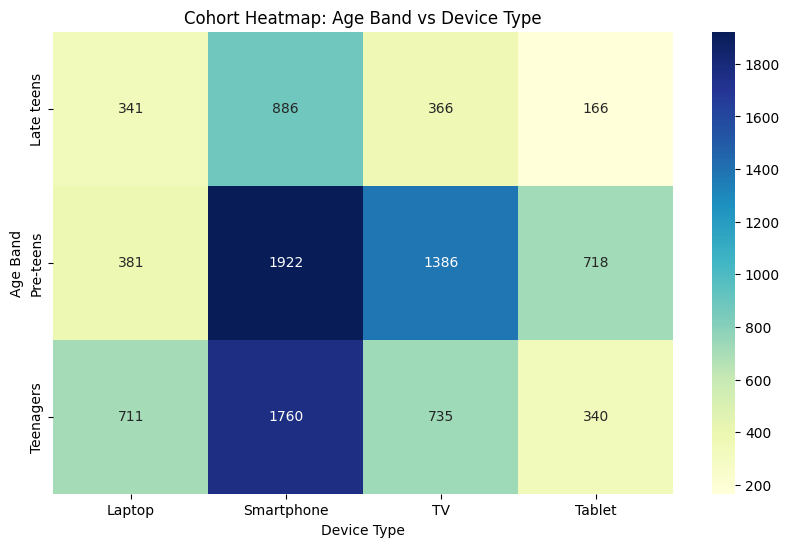

In [11]:
# --- 2. Heatmap for Cohort Analysis ---
cohort_pivot = cohort_counts.pivot(index='Age_Band', columns='Primary_Device', values='User_Count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Cohort Heatmap: Age Band vs Device Type")
plt.xlabel("Device Type")
plt.ylabel("Age Band")
plt.show()


Converts the cohort table into a matrix (pivot) for visualization.

The heatmap color intensity shows how many users belong to each combination.

Darker cells = higher user counts.

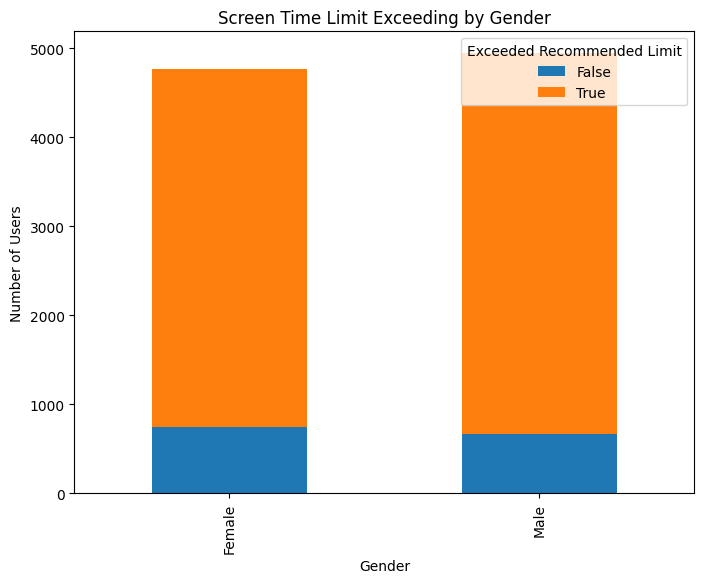

In [12]:
# --- 3. Stacked Bar Chart by Demographic Segments (Gender × Exceeded Limit) ---
gender_segment = df.groupby(['Gender', 'Exceeded_Recommended_Limit']).size().unstack().fillna(0)

gender_segment.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Screen Time Limit Exceeding by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.legend(title="Exceeded Recommended Limit")
plt.show()

Each bar represents a gender (Male/Female/Other).

The bar segments show how many exceeded vs didn’t exceed the limit.

This helps visualize which gender tends to overuse screens more often.

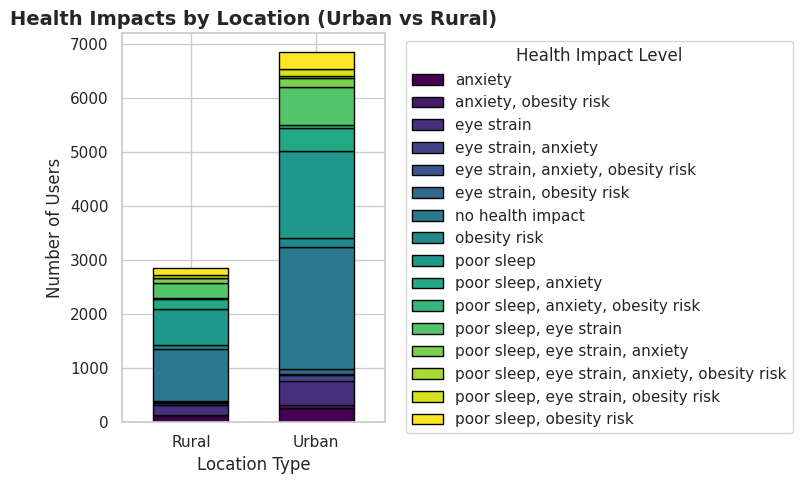

In [17]:
# --- 4. Clean Stacked Bar Chart: Urban vs Rural × Health Impacts ---

import matplotlib.pyplot as plt
import seaborn as sns

# Group and reshape data
location_segment = (
    df.groupby(['Urban_or_Rural', 'Health_Impacts'])
      .size()
      .reset_index(name='User_Count')
)

# Pivot for plotting
pivot_data = location_segment.pivot(index='Urban_or_Rural', columns='Health_Impacts', values='User_Count').fillna(0)

# Set style
sns.set(style="whitegrid")

# Plot
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    edgecolor='black',
    width=0.6,
    colormap='viridis'
)

# Titles and labels
plt.title("Health Impacts by Location (Urban vs Rural)", fontsize=14, weight='bold')
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Health Impact Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


You can easily compare how Urban and Rural users differ in health impact distribution.

For example, Rural areas might have more users with no health issues,
while Urban users might report more eye strain or stress.